In [1]:
import pandas as pd

# Load the training data
train_df = pd.read_csv('data/train.csv')
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


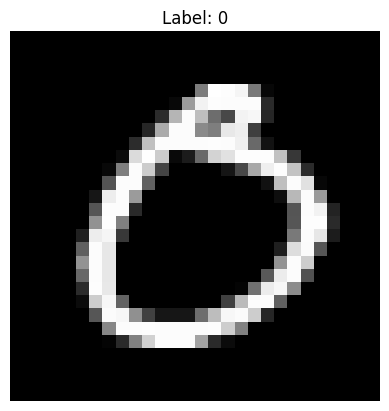

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display a digit image
def display_digit(index, data, labels):
    label = labels[index]
    image = data.iloc[index].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

# Display a random image from the training set
random_index = np.random.randint(0, len(train_df))
display_digit(random_index, train_df.drop('label', axis=1), train_df['label'])

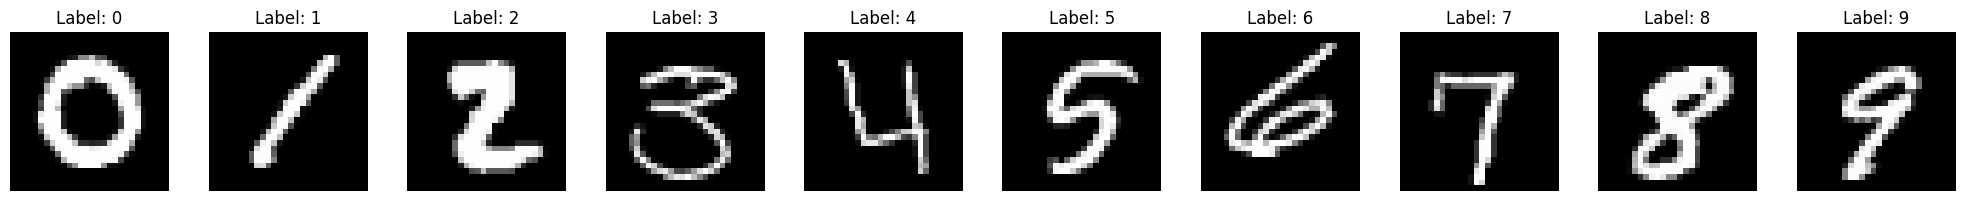

In [3]:
# Display one digit from each class (0 to 9)
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    index = train_df[train_df['label'] == digit].index[0]  # Get the first occurrence of each digit
    image = train_df.loc[index].values[1:].reshape(28, 28)  # Skip the label
    axes[digit].imshow(image, cmap='gray')
    axes[digit].set_title(f'Label: {digit}')
    axes[digit].axis('off')
plt.tight_layout()
plt.show()

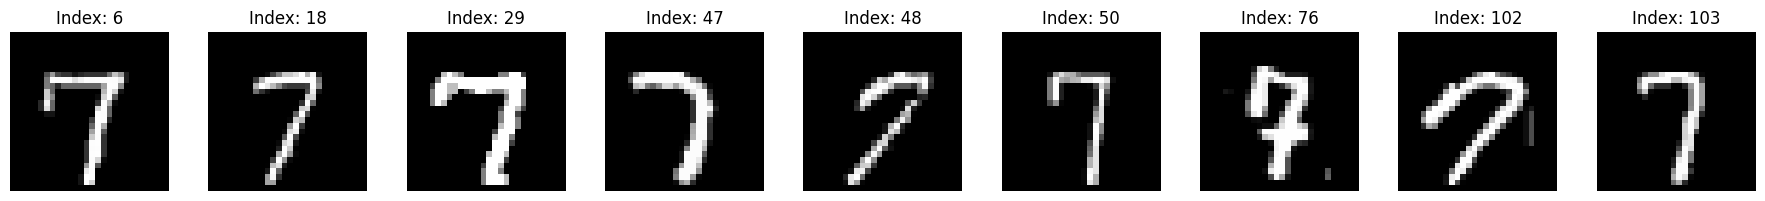

In [4]:
# Visualize different handwriting styles of the digit '7'
fig, axes = plt.subplots(1, 9, figsize=(18, 2))
sevens = train_df[train_df['label'] == 7].head(9)  # Get the first 9 instances of '7'

for i, (index, row) in enumerate(sevens.iterrows()):
    image = row.values[1:].reshape(28, 28)  # Skip the label
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Index: {index}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

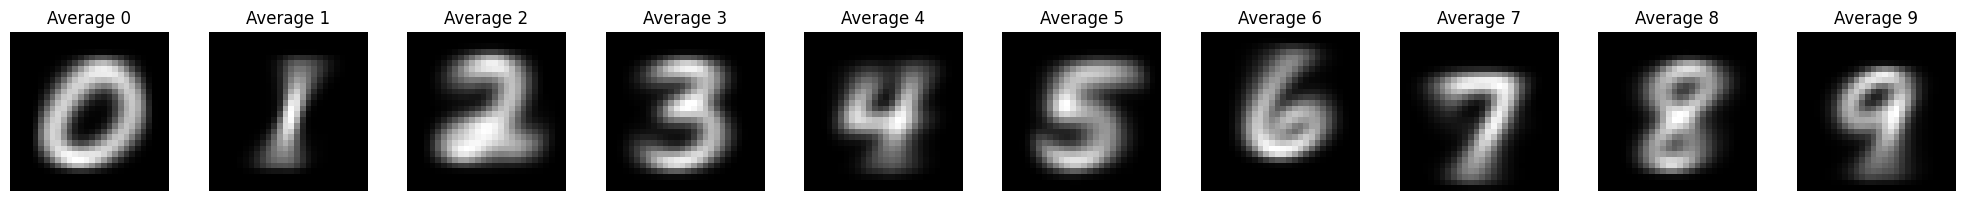

In [5]:
# Compute and display the "average" digit for each class
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    mean_image = train_df[train_df['label'] == digit].drop('label', axis=1).mean().values.reshape(28, 28)
    axes[digit].imshow(mean_image, cmap='gray')
    axes[digit].set_title(f'Average {digit}')
    axes[digit].axis('off')
plt.tight_layout()
plt.show()

In [6]:
from tensorflow.keras.utils import to_categorical

# Separate features and targets
X = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0  
y = to_categorical(train_df['label'], num_classes=10) 

# Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Build the model
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (28, 28, 1) 
num_classes = 10 

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Evaluate the model
history = model.fit(X_train, y_train, batch_size=128, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7042 - loss: 0.9355 - val_accuracy: 0.9602 - val_loss: 0.1444
Epoch 2/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9495 - loss: 0.1584 - val_accuracy: 0.9733 - val_loss: 0.0943
Epoch 3/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9656 - loss: 0.1119 - val_accuracy: 0.9787 - val_loss: 0.0723
Epoch 4/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9716 - loss: 0.0918 - val_accuracy: 0.9807 - val_loss: 0.0631
Epoch 5/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9767 - loss: 0.0733 - val_accuracy: 0.9836 - val_loss: 0.0543
Epoch 6/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9796 - loss: 0.0654 - val_accuracy: 0.9830 - val_loss: 0.0550
Epoch 7/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9818 - loss: 0.0601 - val_accuracy: 0.9855 - val_loss: 0.0480
Epoch 8/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9830 - loss: 0.0535 - val_accuracy: 0

In [10]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.035350650548934937
Validation accuracy: 0.9888095259666443
